In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
import seaborn as sns

In [38]:
# Load the dataset
file_path = 'Data/Chapter06DataSet.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [39]:
# Optional: Check for missing values and basic statistics
print("Missing values:\n", data.isnull().sum())
print("\nDataset statistics:\n", data.describe())

Missing values:
 Weight         0
Cholesterol    0
Gender         0
dtype: int64

Dataset statistics:
            Weight  Cholesterol      Gender
count  547.000000   547.000000  547.000000
mean   143.572212   170.433272    0.513711
std     30.837275    39.147189    0.500269
min     95.000000   102.000000    0.000000
25%    116.000000   136.000000    0.000000
50%    140.000000   169.000000    1.000000
75%    171.000000   208.000000    1.000000
max    203.000000   235.000000    1.000000


In [40]:
# Set styling
sns.set_palette("husl")

# Display first few rows and basic information
print("First few rows of the dataset:")
display(data.head())
print("\nDataset Info:")
display(data.info())
print("\nBasic statistics:")
display(data.describe())

First few rows of the dataset:


,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Weight       547 non-null    int64
 1   Cholesterol  547 non-null    int64
 2   Gender       547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


None


Basic statistics:


,Weight,Cholesterol,Gender
count,547.000000,547.000000,547.000000
mean,143.572212,170.433272,0.513711
std,30.837275,39.147189,0.500269
min,95.000000,102.000000,0.000000
25%,116.000000,136.000000,0.000000
50%,140.000000,169.000000,1.000000
75%,171.000000,208.000000,1.000000
max,203.000000,235.000000,1.000000


Features used for clustering: ['Weight', 'Cholesterol']


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

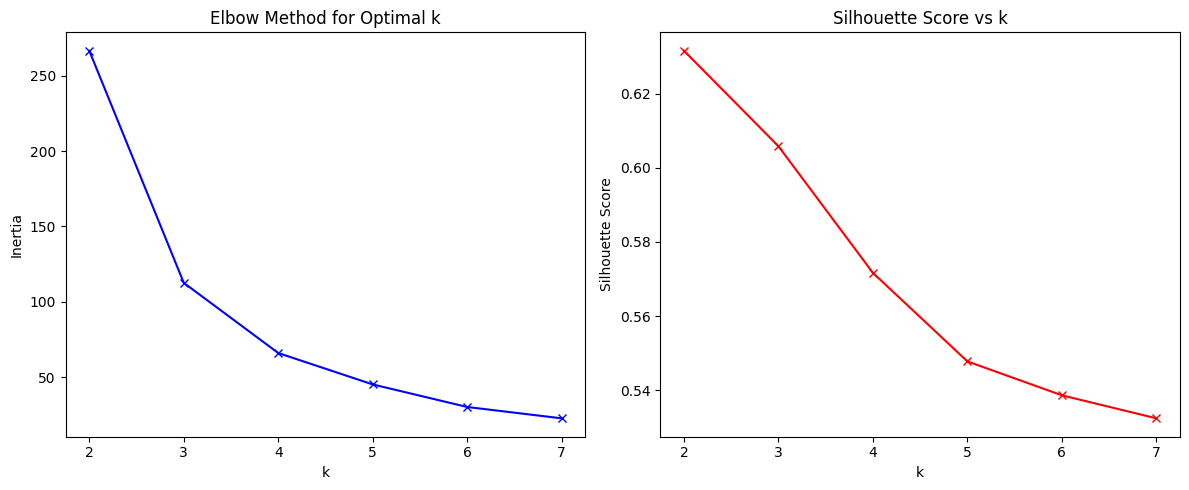

In [41]:
# Prepare data for clustering
features = ['Weight', 'Cholesterol']
print("Features used for clustering:", features)
X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
plt.figure(figsize=(12, 5))

# Plot 1: Elbow curve
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot 2: Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.tight_layout()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


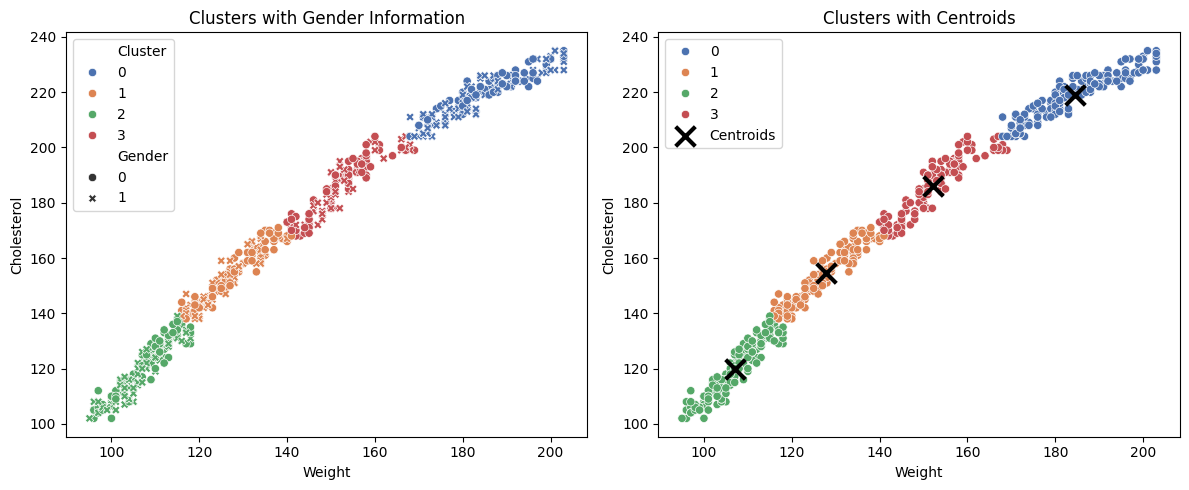


Cluster Analysis:


Weight             Cholesterol        Gender
           mean   std count        mean    std   mean
Cluster                                              
0        184.43  9.74   153      219.01   8.13   0.59
1        127.80  6.81   132      154.52   9.66   0.46
2        106.97  6.21   142      119.80  10.31   0.54
3        152.13  7.10   120      185.91  10.14   0.44


Gender Distribution in Clusters:


Gender,0,1
Cluster,,
0,63,90
1,71,61
2,65,77
3,67,53



Results saved to 'clustering_results.csv'


In [42]:
# Perform K-means clustering with optimal k (let's use k=3 for this example)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clustering results
plt.figure(figsize=(12, 5))

# Plot 1: Clusters with original features
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Weight', y='Cholesterol', hue='Cluster', style='Gender', palette='deep')
plt.title('Clusters with Gender Information')

# Plot 2: Centroids in original feature space
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Weight', y='Cholesterol', hue='Cluster', palette='deep')
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200, linewidth=3, label='Centroids')
plt.title('Clusters with Centroids')
plt.legend()
plt.tight_layout()
plt.show()

# Analysis of clusters
print("\nCluster Analysis:")
cluster_stats = data.groupby('Cluster').agg({
    'Weight': ['mean', 'std', 'count'],
    'Cholesterol': ['mean', 'std'],
    'Gender': 'mean'
}).round(2)
display(cluster_stats)

# Gender distribution in clusters
gender_dist = pd.crosstab(data['Cluster'], data['Gender'])
print("\nGender Distribution in Clusters:")
display(gender_dist)

# Save results
data.to_csv('Chapter06Dataset_clustering_results.csv', index=False)
print("\nResults saved to 'clustering_results.csv'")